<center><h4>EXPERIMENT 2</h4></center>

<center><h4>CLASSIFICATION ON CIFAR-10 DATASET (COLOUR IMAGES)</h4></center>

#### AIM:
To build and train a Convolutional Neural Network (CNN) for classifying color images from the CIFAR-10 dataset into 10 distinct classes.

#### PRE-REQUISITES:
1. Basics of Machine Learning
2. Python Programming
3. Knowledge on Numpy, Pandas, Matplotlib, TensorFlow/ Keras
4. Jupyter Notebook
5. Data Pre-Processing Techniques
6. Knowledge on Neural Networks

#### CIFAR-10 Dataset

- CIFAR-10 contains 60,000 color images of size 32x32 pixels, split into 10 classes. 
- The classes include common objects like airplane, car, bird, cat, deer, dog, frog, horse, ship and truck.
- It has 50,000 training images and 10,000 test images, divided among the 10 classes.

<center><img src='CIFAR.png' border=1 height=600 width=600></center>

### 1. Importing the Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# It tells Jupyter to display Matplotlib plots directly below the code cell that produced them, inside the notebook.
# You don’t need to call plt.show() 
%matplotlib inline

### 2. Importing the Built-in CIFAR-10 dataset from the Keras

In [2]:
from tensorflow.keras.datasets import cifar10

/Users/srinutupakula/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Load the CIFAR-10 dataset as Training and Testing data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape
# 50,000 Images, each image is 32x32 pixel

((50000, 32, 32, 3), (50000, 1))

In [ ]:
# Reading one Image of the CIFAR-10 X_train data
X_train[12]

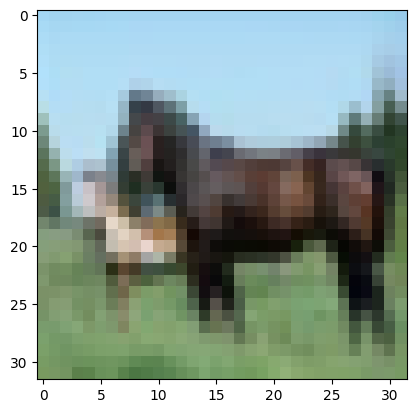

In [6]:
# Viewing the Image 12 of X_train
plt.imshow(X_train[12])

In [7]:
# Checking y_train data
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### 3. Pre-Process the Data as required

In [8]:
# Since, this is classification problem, we need to encode the y_train data
# If not the model assume the y label is a continuous data

In [9]:
# Import the library
from tensorflow.keras.utils import to_categorical

In [10]:
# Shape of the y_train
y_train.shape

(50000, 1)

#### One-hot Encoding the y

In [11]:
# Convert class labels to one-hot encoding
# num_classes=10 tells the function that your classification task has 10 different classes
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10) 

In [12]:
# the index of one represents the actual output digit
# the 8th row belongs to digit 1
y_train_cat[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

#### Scaling the Data

In [13]:
# Each pixel value of every image is ranging from 0 to 255
# So, normalize every value in between 0 to 1

In [14]:
# Normalize the pixel values to range [0, 1]
# the max value of any pixel is 255, so dividing each value with 255 will normalize the value to maximum 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
# Shapes of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### 4. Build the Model

In [16]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Create the Model

In [17]:
# Model Instance
model = Sequential()

In [18]:
# For more complex data, better to add more number of convolution & pooling layers

# Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

/Users/srinutupakula/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Flatten Layer
model.add(Flatten())

In [20]:
# Dense Layers (Fully Connected Layers)
model.add(Dense(256,activation='relu'))

In [21]:
# Output Layer (For multiclass use softmax)
model.add(Dense(10,activation='softmax'))

#### Compile the Model

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Train the Model

In [24]:
# Train the model with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [26]:
# Train the model
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test,y_test_cat), callbacks=[early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3720 - loss: 1.7000 - val_accuracy: 0.5571 - val_loss: 1.2464
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5783 - loss: 1.2030 - val_accuracy: 0.6098 - val_loss: 1.0996
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6524 - loss: 0.9957 - val_accuracy: 0.6529 - val_loss: 0.9903
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6891 - loss: 0.8915 - val_accuracy: 0.6645 - val_loss: 0.9477
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7244 - loss: 0.7834 - val_accuracy: 0.6752 - val_loss: 0.9502


### 5. Evaluate the Model

In [27]:
# Plot the accuracy because we used accuracy metric while compiling the model
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.45680,1.496074,0.5571,1.246428
1,0.59356,1.157182,0.6098,1.099604
2,0.65436,0.990567,0.6529,0.990261
3,0.69186,0.882902,0.6645,0.947666
4,0.72278,0.790694,0.6752,0.950214


<Axes: >

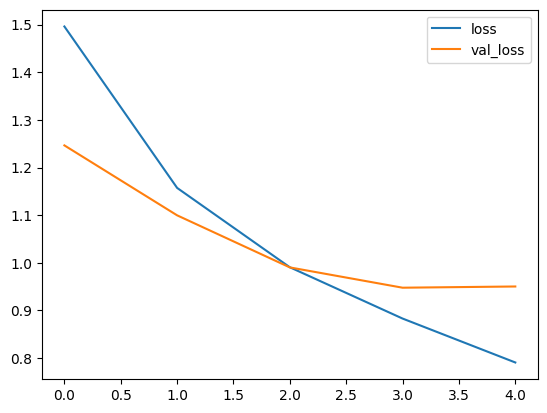

In [28]:
# Plot loss
metrics[['loss', 'val_loss']].plot()

<Axes: >

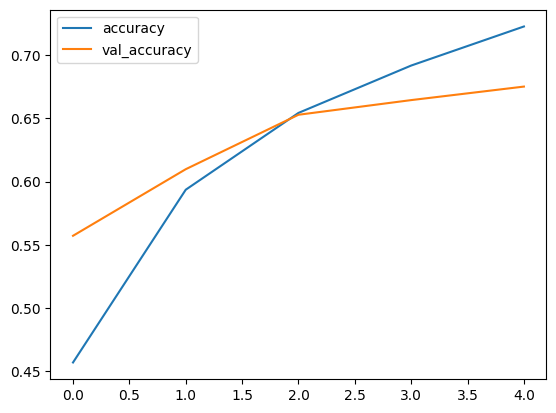

In [29]:
# Plot accuracy
metrics[['accuracy', 'val_accuracy']].plot()

#### Classification report

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Get the Classifications on test data
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [32]:
# y_test is one-hot encoded, convert it to class labels too
y_pred = np.argmax(y_pred, axis=1)

In [33]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.82      0.77      0.79      1000
           2       0.63      0.52      0.57      1000
           3       0.48      0.54      0.51      1000
           4       0.56      0.67      0.61      1000
           5       0.61      0.52      0.56      1000
           6       0.80      0.69      0.74      1000
           7       0.66      0.78      0.71      1000
           8       0.77      0.78      0.78      1000
           9       0.78      0.73      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [34]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[756  21  32  33  26   7   7  22  68  28]
 [ 27 767  10  15   9   7   9  10  41 105]
 [ 82   6 521  76 132  65  46  55   9   8]
 [ 27  13  57 540  93 129  52  63  18   8]
 [ 19   3  53  56 671  41  25 112  18   2]
 [ 15   6  50 227  74 518  19  74  12   5]
 [  9   7  47  88  92  28 685  25  13   6]
 [ 16   2  25  49  64  41   6 778   5  14]
 [ 97  23  11  20  16   7   1  10 784  31]
 [ 24  90  15  26  13   6   9  36  49 732]]


#### Classiying the new image

In [35]:
from tensorflow.keras.preprocessing import image
from PIL import Image

# RGB Image
new_image = Image.open('horse.png').convert('RGB')

In [36]:
# Resize to 28x28
new_image = new_image.resize((32, 32))                  

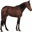

In [37]:
new_image

In [38]:
# Convert to NumPy array and normalize
img_array = np.array(new_image)
img_array = img_array / 255.0 

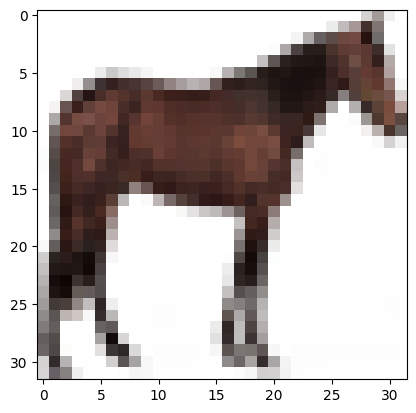

In [39]:
plt.imshow(img_array)

In [40]:
# Reshape to match input shape of model: (1, 32, 32, 3)
img_array = img_array.reshape(1, 32, 32, 3)

In [41]:
pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [42]:
np.argmax(pred, axis=1)
# Index 7 belongs to horse

array([7])

#### RESULT:
A Convolutional Neural Network (CNN) was successfully implemented to classify the CIFAR-10 dataset. The model demonstrated average performance in recognizing various object classes in color images, achieving an accuracy of 68%.